Planning for this cycle

- Cleaning the dataset
- Listing rank of the best stock and chosen them
- Create a first solution faster

# 1.0 - Packages

## 1.1 - Libraries

In [1]:
# data manipulation
import pandas as pd
from datetime import datetime
from IPython.display import clear_output

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# jupyter viewer
from IPython.core.display import display, HTML

## 1.2 - Helper Functions

In [2]:
def jupyter_settings():
    
    # tamanho dos gráficos para o matplotlib
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 20
    # colocando para aparecer todas as colunas e linhas e ponto flutuantes
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.options.display.float_format = '{:.3f}'.format
    pd.set_option('display.expand_frame_repr', False)
    # expandir a visualização da tela em 100%, como se fosse um zoom
    display(HTML('<style>.conteiner{width:100% !important;}</style>'))

    #aplicar as mesmas configurações no seaborn
    sns.set()

jupyter_settings()

# the path when the dataset be
raw_path = '/home/diegopmayer/Documents/projects/ideias/analise-acoes/notebooks/dataset/raw'

# 2.0 - Data Extraction

In [3]:
# select the data loaded on step 2.2 by cycle 01
dataset = pd.read_feather(f'{raw_path}/dataset.ftr')

In [4]:
dataset.head()

,Date,Open,High,Low,Close,Volume,Currency,symbol
0,2007-09-27,5.870,6.130,5.870,5.870,365422,BRL,ABCB4
1,2007-09-28,5.920,5.920,5.830,5.830,94941,BRL,ABCB4
2,2007-10-01,5.790,6.110,5.790,5.940,265772,BRL,ABCB4
3,2007-10-02,5.930,5.960,5.750,5.930,34930,BRL,ABCB4
4,2007-10-03,5.760,5.910,5.760,5.910,34964,BRL,ABCB4


In [5]:
# transforming name of columns to lower case
dataset.columns = dataset.columns.str.lower()
dataset.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'currency', 'symbol'], dtype='object')

# 3.0 - Data Cleaning

## 3.1 - Dimention and NaN

In [6]:
# showing dimension and null values
print(f'{dataset.shape[0]} lines\n     {dataset.shape[1]} Columns')
print(f'{dataset.isna().sum()}')

959655 lines
     8 Columns
date        0
open        0
high        0
low         0
close       0
volume      0
currency    0
symbol      0
dtype: int64


- Conclusion
    - It's a almost 1 milion of lines, but it has a little columns, only 8 columns, the computing do it easly
    - Dont's have no one null information, you mustn't clean them

## 3.2 - Data Type

In [7]:
print(f'Types of data:\n{dataset.dtypes}')
dataset.tail()

Types of data:
date        datetime64[ns]
open               float64
high               float64
low                float64
close              float64
volume               int64
currency            object
symbol              object
dtype: object


,date,open,high,low,close,volume,currency,symbol
959650,2021-07-07,4.730,4.840,4.690,4.830,1399700,BRL,BMGB4
959651,2021-07-08,4.760,4.760,4.680,4.700,949100,BRL,BMGB4
959652,2021-07-12,4.740,4.860,4.710,4.840,1955700,BRL,BMGB4
959653,2021-07-13,4.840,4.900,4.750,4.890,1491600,BRL,BMGB4
959654,2021-07-14,4.890,4.910,4.830,4.860,333100,BRL,BMGB4


- Conclusion
    - It's all datatype ok

## 3.3 - Descriptive Statistics

In [8]:
dataset.describe(include="all", datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
date,959655,NaN,NaN,NaN,2013-05-15 07:21:12.123419648,1995-01-02 00:00:00,2009-06-10 00:00:00,2014-07-25 00:00:00,2018-05-18 00:00:00,2021-07-14 00:00:00,NaN
open,959655.000,NaN,NaN,NaN,29.709,0.000,3.900,9.120,18.320,84410.360,346.521
high,959655.000,NaN,NaN,NaN,30.156,0.000,3.990,9.280,18.640,20200.390,342.037
low,959655.000,NaN,NaN,NaN,28.990,0.000,3.820,8.950,17.990,19468.930,326.774
close,959655.000,NaN,NaN,NaN,29.573,0.000,3.900,9.110,18.310,20157.870,334.334
volume,959655.000,NaN,NaN,NaN,12633708.334,0.000,11900.000,203418.000,1477400.000,77548822528.000,347732917.884
currency,959655,1,BRL,959655,NaN,NaN,NaN,NaN,NaN,NaN,NaN
symbol,959655,374,BBDC3,13040,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Points of view

- there are a price values equal zero "0"
    - ✅ dropped 8 registers equal zero
- there are a volume egual zero
    - ⚠️ not solved, left to another cycle
- there are a highest price per stock in "max" with 20 thousand, is it correct?

### 3.3.1 - Price equal zero

In [9]:
# zero cotation
# getting the name of week in each day
dataset.loc[:, 'weekday'] = dataset.loc[:, 'date'].apply(lambda x: x.strftime('%A'))
# seeing the minimum value groupby day of week
dataset.groupby(by=['weekday']).min().reset_index()

,weekday,date,open,high,low,close,volume,currency,symbol
0,Friday,1995-01-06,0.000,0.000,0.000,0.000,0,BRL,AALR3
1,Monday,1995-01-02,0.010,0.010,0.010,0.010,0,BRL,AALR3
2,Thursday,1995-01-05,0.000,0.000,0.000,0.000,0,BRL,AALR3
3,Tuesday,1995-01-03,0.010,0.010,0.010,0.010,0,BRL,AALR3
4,Wednesday,1995-01-04,0.000,0.000,0.000,0.000,0,BRL,AALR3


In [10]:
# dropping lines with price equal zero
print(f"{dataset[dataset['close'] == 0].shape[0]} registers deleted")
dataset.drop(dataset[dataset['close'] == 0].index, axis=0, inplace=True)

8 registers deleted


### 3.3.2 - Operation volume equal zero

In [11]:
# getting year from date and create a new columns called year
dataset.loc[:, 'year'] = dataset.loc[:, 'date'].dt.year
dataset.loc[dataset[dataset['volume'] == 0].index].groupby(['year']).count().head()

,date,open,high,low,close,volume,currency,symbol,weekday
year,,,,,,,,,
1995,280,280,280,280,280,280,280,280,280
1996,385,385,385,385,385,385,385,385,385
1997,353,353,353,353,353,353,353,353,353
1998,225,225,225,225,225,225,225,225,225
1999,301,301,301,301,301,301,301,301,301


We Left this step to other cycle

### 3.3.3 - Highest price per stock

In [12]:
# getting value of the hightes register to see in the internet to validation value
dataset.sort_values(by='close', ascending=False).head()

,date,open,high,low,close,volume,currency,symbol,weekday,year
681341,2007-07-23,19562.490,20157.870,19400.880,20157.870,430,BRL,VIVR3,Monday,2007
681396,2007-10-09,19562.490,19945.230,19468.930,19945.230,531,BRL,VIVR3,Tuesday,2007
681340,2007-07-20,19766.620,19775.120,19052.160,19732.600,670,BRL,VIVR3,Friday,2007
681339,2007-07-19,18924.580,19775.120,18882.050,19562.490,847,BRL,VIVR3,Thursday,2007
681342,2007-07-24,20200.390,20200.390,19392.380,19562.490,585,BRL,VIVR3,Tuesday,2007


There are inconsistence with values between sites and APIs, wicth is confiable?

<!-- We will let this for the next cycle -->

# 4.0 - Data Engineering

In [13]:
# Creating some features:
# year, week_of_year, day_of_week, day, growth_close
dataset.loc[:, 'year']  = dataset.loc[:, 'date'].dt.year
dataset.loc[:, 'week_of_year'] = dataset.loc[:, 'date'].dt.week
dataset.loc[:, 'day_of_week'] = dataset.loc[:, 'date'].dt.dayofweek
dataset.loc[:, 'day'] = dataset.loc[:, 'date'].dt.day
#dataset.loc[:, 'holiday'] = dataset.loc[:, 'date'] - next cycle

# getting a list of index
list_index = dataset['date'].index
growth_price = list()
# looping to calculating each actual day with one day before and adding to list
for index_item in list_index:
    try:
        actual_price = dataset.loc[index_item, 'close']
        day_before_price = dataset.loc[index_item-1, 'close']
        growth_price.append((((actual_price - day_before_price)/day_before_price)*100).round(4))
    except:
        growth_price.append(0)
dataset.loc[:, 'growth_price'] = growth_price

# sma = Simple Moving Average
dataset.loc[:, 'sma'] = dataset['close'].rolling(7).mean()

/tmp/ipykernel_5829/1415303623.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  dataset.loc[:, 'week_of_year'] = dataset.loc[:, 'date'].dt.week


Tomorrow I will solve the issue above about isocalendar 👆

# 5.0 - Hyphotesis

## 5.1 - Ranking

In [14]:
range_date = '2020-04-01'
dataset_pandemic = dataset[dataset['date'] >= range_date]

In [15]:
dataset_pandemic.groupby(by=['symbol']).sum().sort_values(by='growth_price', ascending=False).head()

,open,high,low,close,volume,year,week_of_year,day_of_week,day,growth_price,sma
symbol,,,,,,,,,,,
MMXM3,2968.820,3188.480,2772.250,2943.250,86113400,565693,7227,559,4329,567.484,2896.619
HBTS5,4941.300,5161.830,4784.750,4978.580,447600,355596,4701,353,2646,491.968,4815.461
BSLI4,4136.330,4312.550,3993.940,4135.220,331900,244533,2007,230,1795,372.760,4074.836
AZEV3,1415.780,1479.170,1355.640,1407.480,36367484,638451,8066,628,4901,349.840,1390.250
MWET4,2420.970,2565.650,2315.340,2430.050,9677000,618251,7946,606,4813,334.524,2333.393


<AxesSubplot:>

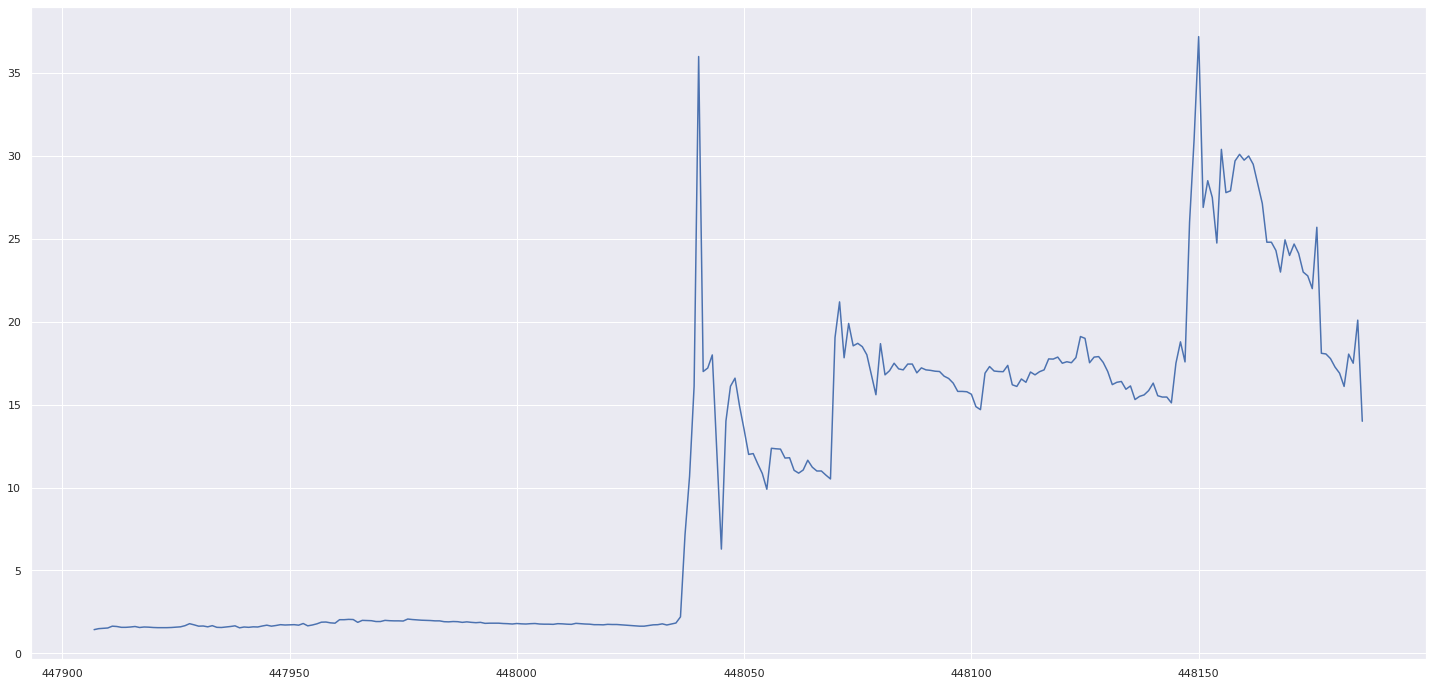

In [16]:
dataset_pandemic[dataset_pandemic['symbol'] == 'MMXM3']['close'].plot()

<AxesSubplot:>

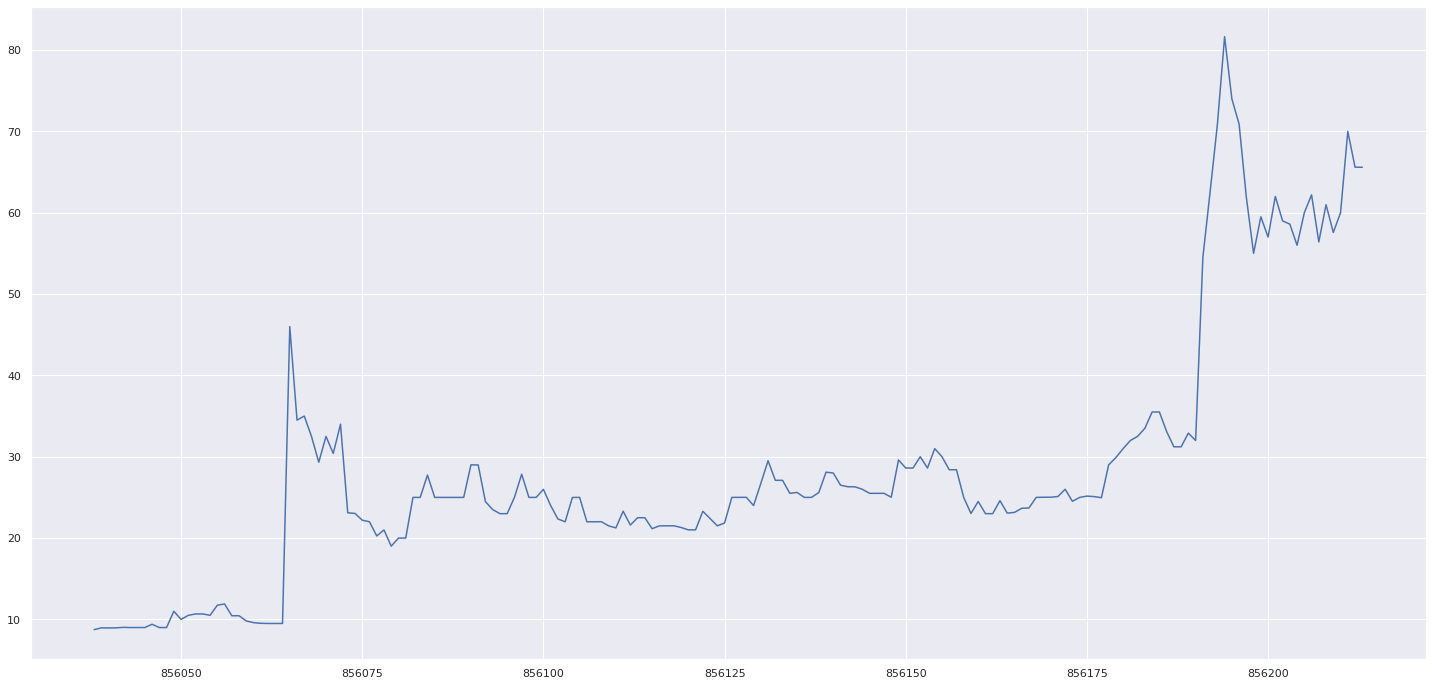

In [17]:
dataset_pandemic[dataset_pandemic['symbol'] == 'HBTS5']['close'].plot()

The two first analysis

- MMXM3 -> Diego
- HBTS5 -> Guilherme